# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import os

# Pengaturan visualisasi
sns.set(style="whitegrid")

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [10]:
# Memuat dataset
# dataset source https://www.kaggle.com/datasets/kundanbedmutha/exam-score-prediction-dataset?resource=download

df = pd.read_csv('exam_score_prediction_raw.csv')

# Menampilkan informasi dasar
print("Info Dataset:")
print(df.info())
print("\n5 Baris Pertama:")
display(df.head())

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 2.0+ MB
None

5 Baris Pertama:


,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Statistik Deskriptif:


,student_id,age,study_hours,class_attendance,sleep_hours,exam_score
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,10000.504600,20.473300,4.007604,70.017365,7.00856,62.513225
std,5773.654959,2.284458,2.308313,17.282262,1.73209,18.908491
min,1.000000,17.000000,0.080000,40.600000,4.10000,19.599000
25%,5000.750000,18.000000,2.000000,55.100000,5.50000,48.800000
50%,10000.500000,20.000000,4.040000,69.900000,7.00000,62.600000
75%,15000.250000,22.000000,6.000000,85.000000,8.50000,76.300000
max,20001.000000,24.000000,7.910000,99.400000,9.90000,100.000000


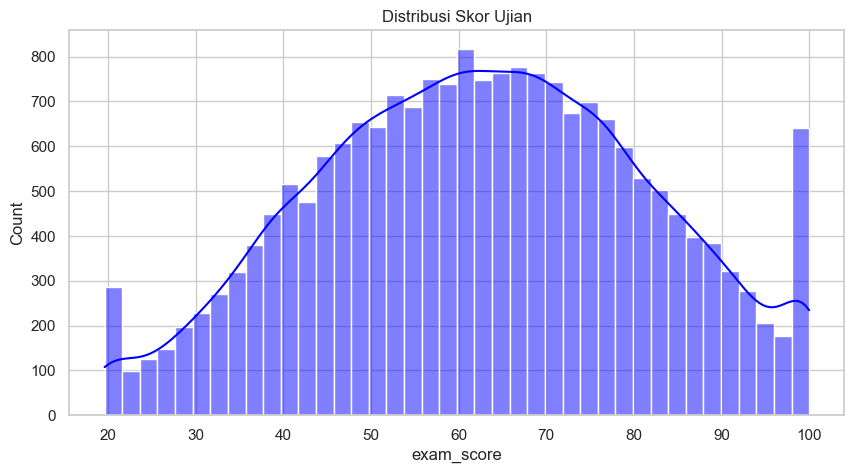

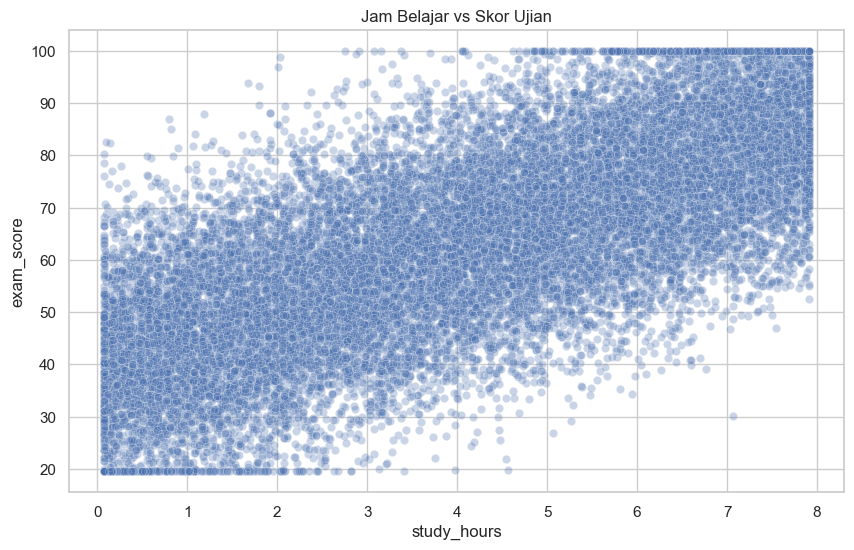

C:\Users\Nauval Faiq\AppData\Local\Temp\ipykernel_3040\3857173687.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='exam_difficulty', y='exam_score', data=df, palette='Set2')


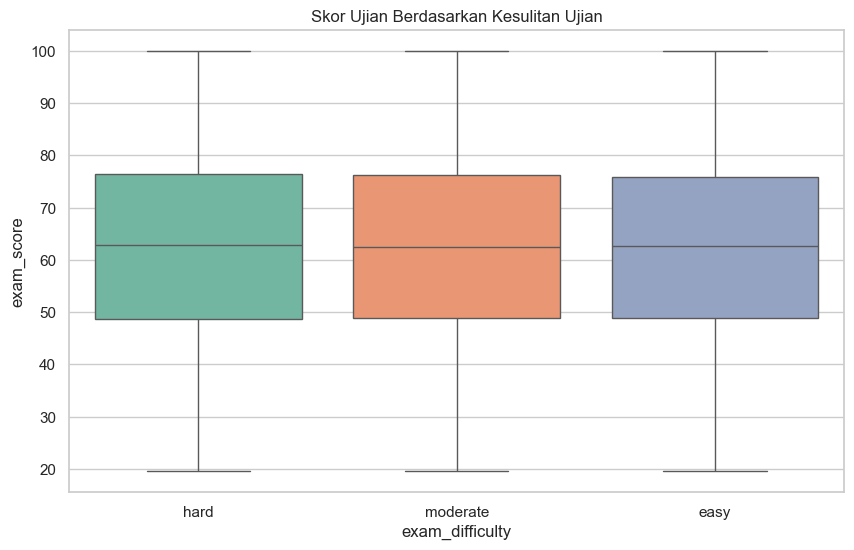

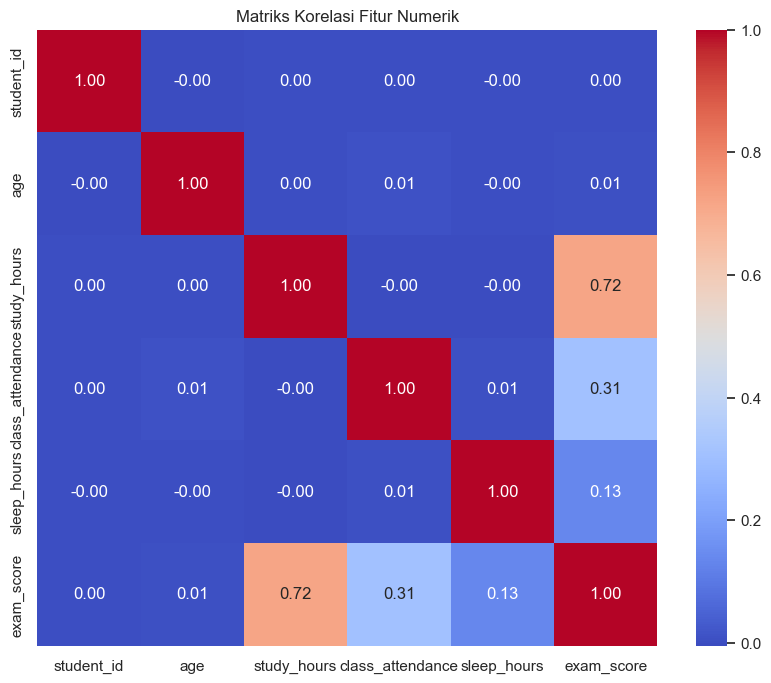

In [11]:
#Type your code here

# 1. Statistik Deskriptif
print("Statistik Deskriptif:")
display(df.describe())

# 2. Distribusi Target (Exam Score)
plt.figure(figsize=(10, 5))
sns.histplot(df['exam_score'], kde=True, color='blue')
plt.title('Distribusi Skor Ujian')
plt.show()

# 3. Hubungan Jam Belajar vs Skor Ujian (Korelasi Numerik)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='study_hours', y='exam_score', data=df, alpha=0.3)
plt.title('Jam Belajar vs Skor Ujian')
plt.show()

# 4. Boxplot Fitur Kategorikal (Contoh: Exam Difficulty)
plt.figure(figsize=(10, 6))
sns.boxplot(x='exam_difficulty', y='exam_score', data=df, palette='Set2')
plt.title('Skor Ujian Berdasarkan Kesulitan Ujian')
plt.show()

# 5. Heatmap Korelasi (Hanya untuk fitur numerik)
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi Fitur Numerik')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [12]:
# 1. Menghapus kolom yang tidak relevan
df_clean = df.drop(columns=['student_id'])

# 2. Encoding Data Kategorikal
# Kita gunakan LabelEncoder untuk fitur kategorikal
le = LabelEncoder()
cat_cols = df_clean.select_dtypes(include=['object']).columns

for col in cat_cols:
    df_clean[col] = le.fit_transform(df_clean[col])

# 3. Memisahkan Fitur (X) dan Target (y)
X = df_clean.drop(columns=['exam_score'])
y = df_clean['exam_score']

# 4. Normalisasi/Standarisasi Fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Split Dataset (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 6. Menyimpan hasil preprocessing untuk tahap berikutnya (Requirement Kriteria 1)
os.makedirs('preprocessing/exam_score_prediction_preprocessing', exist_ok=True)
pd.DataFrame(X_test).to_csv('preprocessing/exam_score_prediction_preprocessing/X_test.csv', index=False)
pd.DataFrame(y_test).to_csv('preprocessing/exam_score_prediction_preprocessing/y_test.csv', index=False)
pd.DataFrame(X_train).to_csv('preprocessing/exam_score_prediction_preprocessing/X_train.csv', index=False)
pd.DataFrame(y_train).to_csv('preprocessing/exam_score_prediction_preprocessing/y_train.csv', index=False)

print("Preprocessing Selesai. Data telah disimpan di folder 'preprocessing/exam_score_prediction_preprocessing'.")

Preprocessing Selesai. Data telah disimpan di folder 'preprocessing/exam_score_prediction_preprocessing'.
